## 参考

* 式展開
    * https://www.slideshare.net/KenjiUrai/explanation-of-gpr
* ハイパーパラメータ
    * https://qiita.com/ctgk/items/4c4607edf15072cddc46

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
inv = lambda X: np.linalg.inv(X)

norm = lambda x: np.linalg.norm(x)

def kernel(x, y, a=1, b=1):
    return a*np.exp(-b*0.5*norm(x-y)**2)
    
def K(X, a=1, b=1):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j],a, b) 
    return KM

def k(X_h, X, a=1, b=1):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i],a, b) 
    return kM

def k_(X, a=1, b=1):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i], a, b)
    return kv

def grad(X, a=1, b=1):
    N = X.shape[1]
    GA, GB = np.zeros((N,N)), np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            diff = norm(X[:,i]-X[:,j])**2
            GA[i,j] = np.exp(-0.5*b*diff)
            GB[i,j] = -0.5*a*b*diff*GA[i,j]
    return GA, GB

update = lambda y, C, G: -0.5*np.trace(C.dot(G))+0.5*y.T.dot(C.dot(G.dot(C.dot(y))))

"""
sg = 1 # yの分散(適当)
a, b = 1, 1 # カーネルのパラメータ(適当)
lr = 0.1 # 学習率(適当)
"""
def train(X, Xh, y, sg=0.1, a=1, b=1, lr=0.1, epoch=50):
    for i in range(epoch):
        # カーネル計算
        Cm = inv(K(X, a, b)+sg*np.eye(X.shape[1],X.shape[1]))
        kv = k(Xh, X, a, b)
        kh = k_(Xh, a, b)
    
        # ハイパーパラメータの更新
        GA, GB = grad(X, a, b)
        a += lr*update(y, Cm, GA)
        b += lr*update(y, Cm, GB)
        print(a, b)
    
    # 平均値と分散
    yh_mean = kv.T.dot(Cm).dot(y)
    yh_std = np.sqrt(kh - np.diag(kv.T.dot(Cm).dot(kv)).reshape(-1,1))
    
    return yh_mean, yh_std

In [34]:
num = 100
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)])
ran = np.random.rand(data.shape[1])
target = np.sin(data[0,:])+np.cos(data[1,:])+ran

# 学習用データ
sample_num = 100
sample = random.sample(range(data.shape[1]),k=data.shape[1])
X = data[0:2, sample[:sample_num]]
y = target[sample[:sample_num]].reshape(-1,1)

# 予測用データ
Xh = np.array([np.linspace(0,2*np.pi,num), np.zeros(num)])

In [30]:
y_true = np.sin(data[0,:])+np.cos(np.zeros(num))+np.random.rand(data.shape[1])
print(y_true.shape, X[0,:].shape)

(100,) (25,)


[[ 0.84680906]] [[ 0.39559194]]
[[ 0.93121152]] [[ 0.22119221]]
[[ 1.11205787]] [[ 0.2815663]]
[[ 1.14908874]] [[ 0.21227337]]
[[ 1.23169662]] [[ 0.23009759]]
[[ 1.27252995]] [[ 0.20448054]]
[[ 1.32613323]] [[ 0.20850383]]
[[ 1.36321522]] [[ 0.19530088]]
[[ 1.40509334]] [[ 0.19758272]]
[[ 1.43639483]] [[ 0.18752761]]


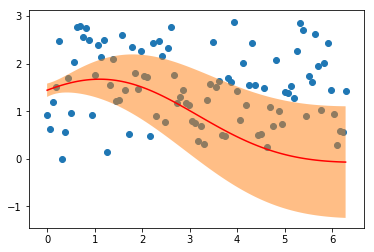

In [35]:
# 学習(パラメータは適当)
yh_mean, yh_std = train(X, Xh, y, epoch = 10)

# plot
plt.plot(Xh[0,:],yh_mean,c="red")
y_true = np.sin(data[0,:])+np.cos(np.zeros(num))+ran
plt.scatter(X[0,:], y_true)
plt.fill_between(Xh[0,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)

In [8]:
from sklearn.datasets import load_boston

data = load_boston().data.T
y = load_boston().target

np.corrcoef(data,y)[-1]

#np.ones(10).shape
np.linspace(0,1,10).shape

(10,)

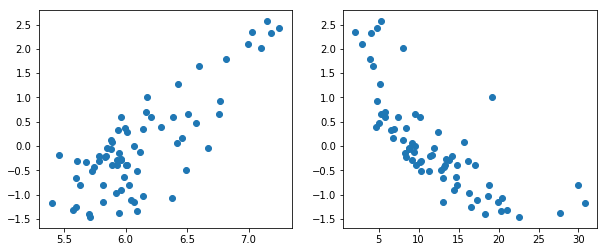

In [18]:

length= 70
X = np.array([data[5,:length],data[12,:length]])
y = load_boston().target[:length].reshape(-1,1)
y = (y-y.mean())/y.std() # 平均をゼロに?

# x1, x2 の片方の値は固定
num = 70
Xh = np.array([X[0,10]*np.ones(num),np.linspace(X[1].min(),X[1].max(),num)])

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(X[0], y)
plt.subplot(122)
plt.scatter(X[1], y)

#np.linspace(X[0].min(),X[0].max(),num)

In [19]:
# 学習(パラメータは適当)
yh_mean, yh_std = train(X, Xh, y, epoch=10)

[[ 1.17779444]] [[ 1.20547617]]
[[ 1.18110213]] [[ 1.53143933]]
[[ 1.1327336]] [[ 1.61693005]]
[[ 1.11025337]] [[ 1.63022481]]
[[ 1.10826959]] [[ 1.63826243]]
[[ 1.10660762]] [[ 1.63887836]]
[[ 1.10662557]] [[ 1.6394936]]
[[ 1.10648297]] [[ 1.63947899]]
[[ 1.1065004]] [[ 1.6395327]]
[[ 1.10648638]] [[ 1.63952548]]


(70,) (70, 1)


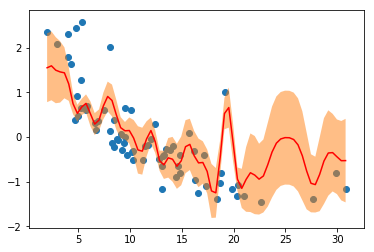

In [20]:
print(Xh[0,:].shape,y.shape)

# plot
idx = 1
plt.plot(Xh[idx,:],yh_mean,c="red")
plt.scatter(X[idx,:], y)
plt.fill_between(Xh[idx,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)

In [49]:
X[:,1]


array([ 6.421,  9.14 ])